In [1]:
import numpy as np
from pathlib import Path

In [2]:
WORKING_DIR = Path.cwd()

dataset = np.load(str(WORKING_DIR / 'yale_data.npy'))
target = np.load(str(WORKING_DIR / 'yale_target.npy'))

In [3]:
x  =  dataset 
y = target

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [6]:
x_test.shape

(450, 5236)

In [7]:

nof_prin_components = 75
pca = PCA(n_components=nof_prin_components, whiten=True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)



x_test_pca.shape

(450, 75)

In [10]:
from sklearn.metrics import accuracy_score


# Range of hidden_neurons values
# you can test accuracy of a range of hidden neurons
# beware that it might take lot of time to execute if you choose to do so

hidden_neurons_values = [70]

# Number of tests to run for each hidden_neurons value
num_tests = 10

# Dictionary to store results
results = {'hidden_neurons': [], 'accuracy': []}

for hidden_neurons in hidden_neurons_values:
    accuracy_scores = []
    for _ in range(num_tests):
        clf = MLPClassifier(
            hidden_layer_sizes=(hidden_neurons,),
            solver='adam',
            activation='relu',
            batch_size=256,
            verbose=False,
            shuffle=True,
            early_stopping=True,
        ).fit(x_train_pca, y_train)

        y_pred = clf.predict(x_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Store results for this hidden_neurons value
    results['hidden_neurons'].append(hidden_neurons)
    results['accuracy'].append(accuracy_scores)
    

results['accuracy'] = np.array(results['accuracy'])

# Mean and standard deviation for each hidden_neurons value
mean_accuracies = np.mean(results['accuracy'], axis=1)
std_accuracies = np.std(results['accuracy'], axis=1)

# Print 
for i, hidden_neurons in enumerate(results['hidden_neurons']):
    print(f"Hidden Neurons: {hidden_neurons}, Mean Accuracy: {mean_accuracies[i]}, Std Dev: {std_accuracies[i]}")


Hidden Neurons: 70, Mean Accuracy: 0.8837777777777779, Std Dev: 0.01901396497833978


In [11]:
for i, hidden_neurons in enumerate(results['hidden_neurons']):
    print(f"{std_accuracies[i]:.4f}")

0.0190


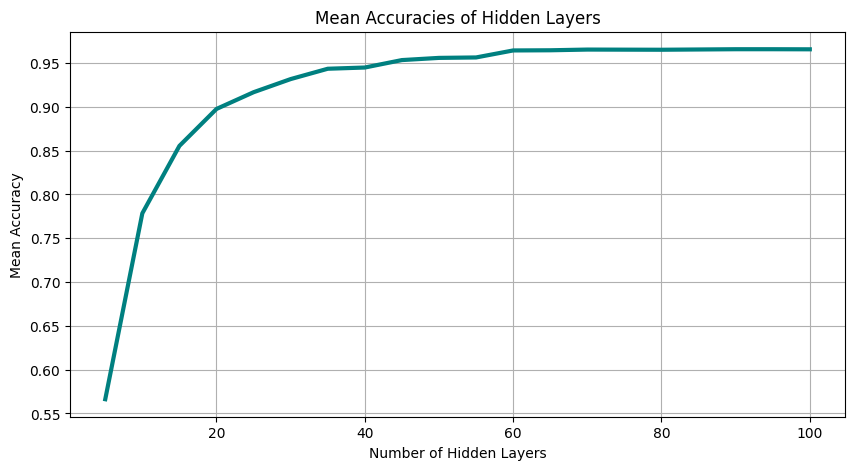

In [13]:
import matplotlib.pyplot as plt
# Mean accuracies data
hidden_neurons = list(range(5, 101, 5))
mean_accuracies = [0.5662, 0.7785, 0.8555, 0.8977, 0.9168, 0.9318, 0.9436, 0.945, 0.9535, 0.956,
                   0.9565, 0.9645, 0.9647, 0.9655, 0.9654, 0.9653, 0.9656, 0.9659, 0.9659, 0.9658]

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(hidden_neurons, mean_accuracies, linewidth=3, color='teal')
plt.title('Mean Accuracies of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Accuracy')
# plt.xlim(0, 100)
# plt.ylimg(0, 1)
plt.grid(True)
plt.show()


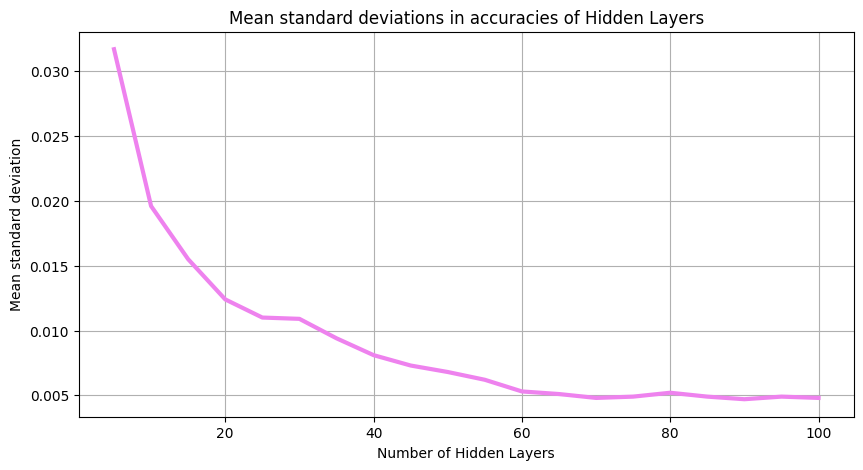

In [14]:
hidden_neurons = list(range(5, 101, 5))
mean_stddev = [0.0317, 0.0196, 0.0155, 0.0124, 0.0110, 0.0109, 0.0094, 0.0081, 0.0073, 0.0068, 
               0.0062, 0.0053, 0.0051, 0.0048, 0.0049, 0.0052, 0.0049, 0.0047, 0.0049, 0.0048]

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(hidden_neurons, mean_stddev, linewidth=3, color='violet')
plt.title('Mean standard deviations in accuracies of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean standard deviation')
# plt.xlim(0, 100)
# plt.ylimg(0, 1)
plt.grid(True)
plt.show()

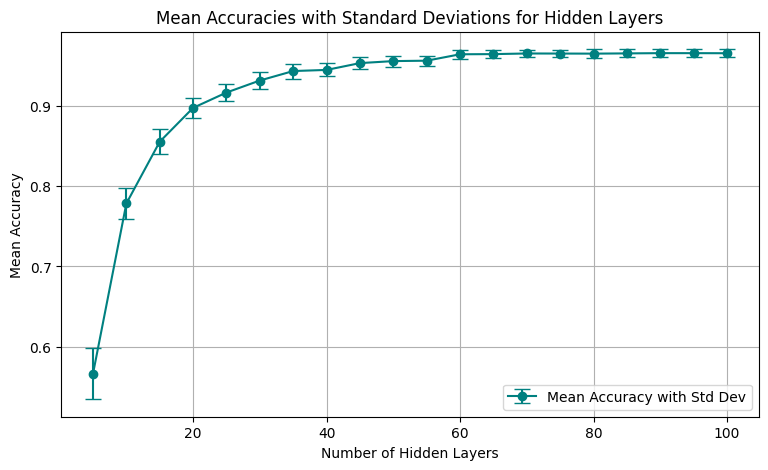

In [15]:
import matplotlib.pyplot as plt

# Data
hidden_neurons = list(range(5, 101, 5))
mean_accuracies = [0.5662, 0.7785, 0.8555, 0.8977, 0.9168, 0.9318, 0.9436, 0.945, 0.9535, 0.956,
                   0.9565, 0.9645, 0.9647, 0.9655, 0.9654, 0.9653, 0.9656, 0.9659, 0.9659, 0.9658]

std_deviations = [0.0317, 0.0196, 0.0155, 0.0124, 0.0110, 0.0109, 0.0094, 0.0081, 0.0073, 0.0068, 
                   0.0062, 0.0053, 0.0051, 0.0048, 0.0049, 0.0052, 0.0049, 0.0047, 0.0049, 0.0048]

# Plotting the graph with error bars
plt.figure(figsize=(9, 5))
plt.errorbar(hidden_neurons, mean_accuracies, yerr=std_deviations, fmt='-o', capsize=6, label='Mean Accuracy with Std Dev', color='teal')
plt.title('Mean Accuracies with Standard Deviations for Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Cross validation

from sklearn.model_selection import cross_val_score
acc_scores = cross_val_score(clf, x_train, y_train , cv=10)
acc_scores

array([0.05714286, 0.03809524, 0.03809524, 0.05714286, 0.01904762,
       0.01904762, 0.06666667, 0.03809524, 0.01904762, 0.03809524])

The cross validation accuracy scores were poor, which might be the reusult of the dataset being small (only 1500 images with 30 classes). 